In [1]:
#https://github.com/Cartucho/mAP 
#https://github.com/rahatzamancse/yolo-evaluation-on-custom-dataset/blob/master/convert_to_yolo_format.py
import os
import cv2
import numpy as np
from PIL import ImageDraw, ImageFont, Image

In [80]:
img_path = 'dataset/images/'
label_path = 'dataset/labels/'

def parse_label(obj, width, height):
    cls_id, cx, cy, w, h = obj
    x1 = (cx-w/2)*width
    y1 = (cy-h/2)*height
    x2 = (cx+w/2)*width
    y2 = (cy+h/2)*height
    return [cls_id, x1, y1, x2, y2]

def load_and_parse(img_path, label_path):
    img = cv2.imread(img_path)
    height, width, _ = img.shape
    bboxes = np.loadtxt(label_path, dtype=np.float64)
    if bboxes.ndim < 2:
        bboxes = np.expand_dims(bboxes, axis = 0)
    bboxes = np.apply_along_axis(parse_label,1,bboxes, width, height)
    return bboxes

def draw_img(img_path, result):
    img = Image.open(img_path)
    draw =ImageDraw.Draw(img)
    for bbox in result:
        cls_id, x1, y1, x2, y2 = bbox
        draw.rectangle((x1, y1, x2, y2), outline=(0,255,0))
    display(img)

In [97]:
img_list = os.listdir(img_path)
label_list = os.listdir(label_path)

In [101]:
imgs = []
for img in img_list:
    imgs.append(img_path+img)
labels = []
for label in img_list:
    labels.append(label_path+label[:-3]+'txt')
labels[0], imgs[0]

('dataset/labels/-12-HDCondellJoseMiguelInfante_2020-08-04_07h30min00s000ms-635_jpg.rf.ad57c2bc824eb89635848104ece11993.txt',
 'dataset/images/-12-HDCondellJoseMiguelInfante_2020-08-04_07h30min00s000ms-635_jpg.rf.ad57c2bc824eb89635848104ece11993.jpg')

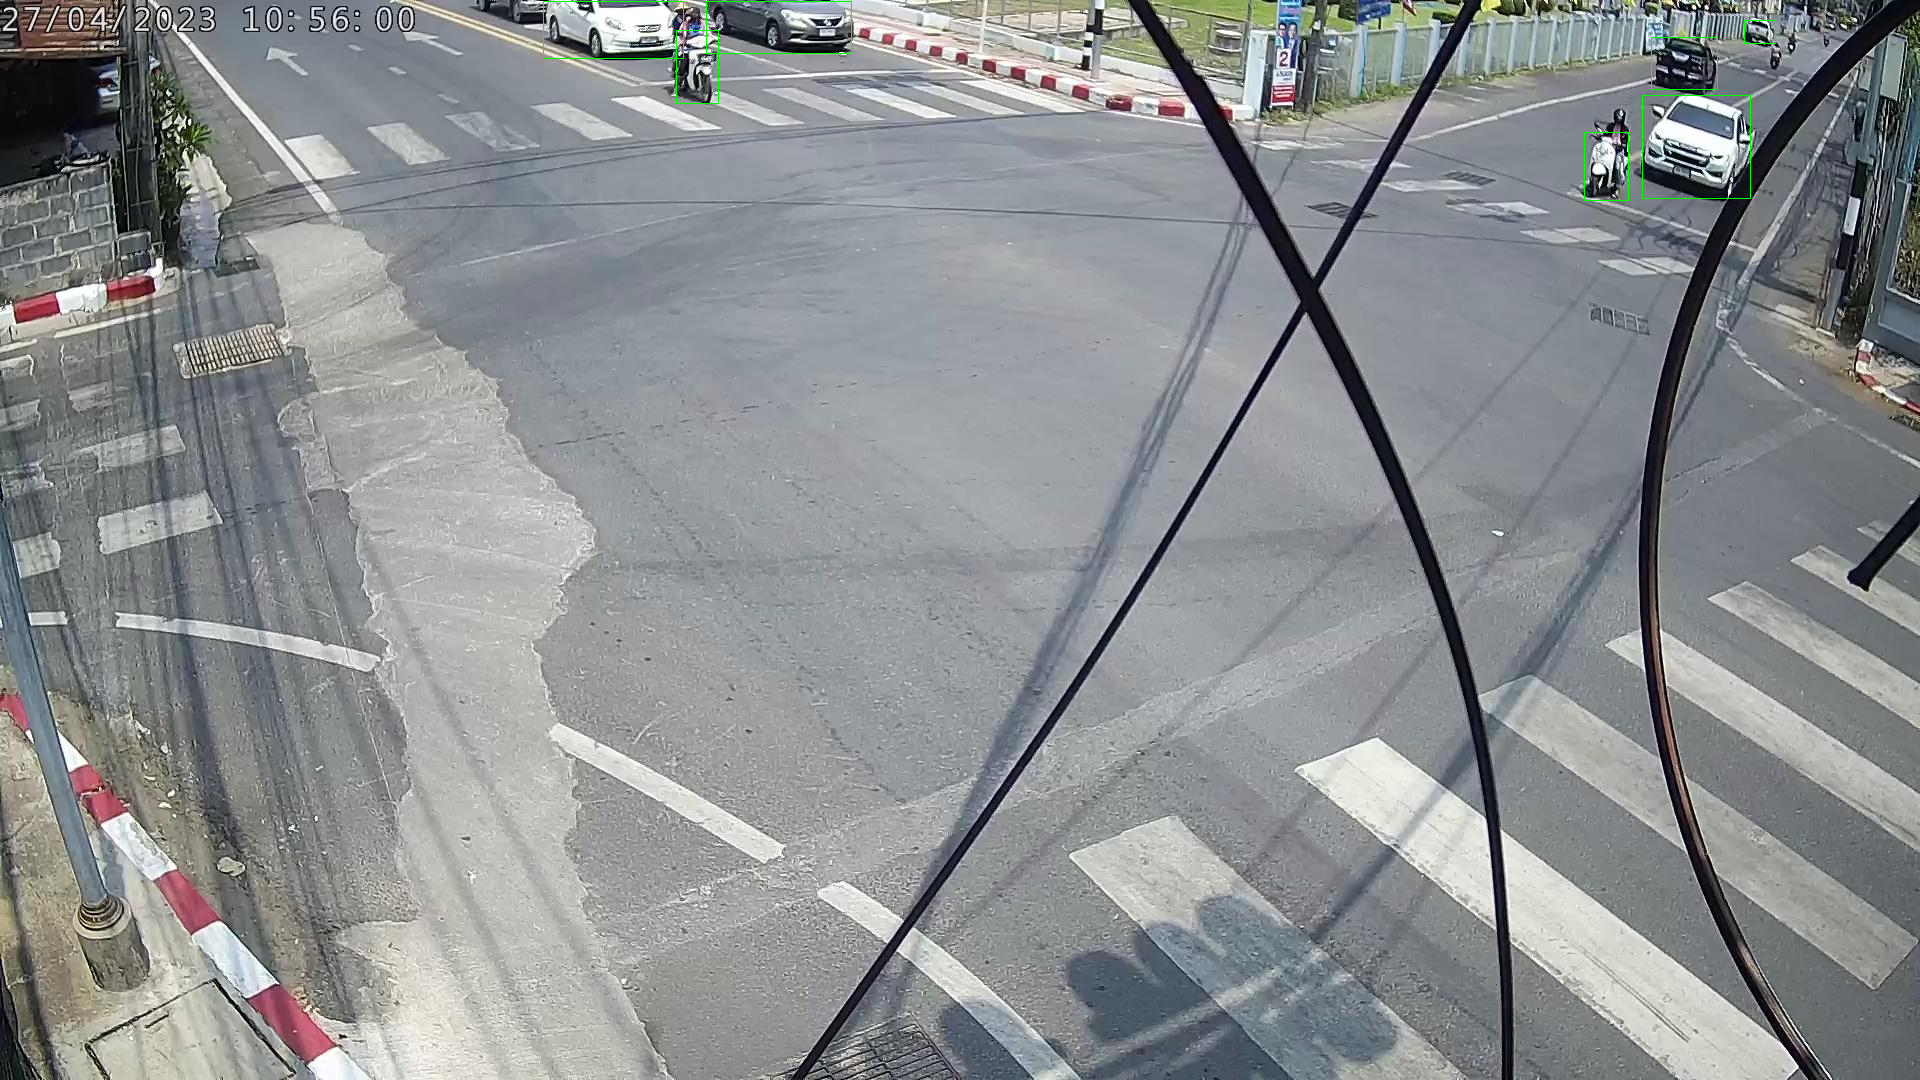

In [105]:
result = load_and_parse(imgs[500], labels[500])
# print(result)
draw_img(imgs[500], result)

In [75]:
bboxes = np.loadtxt(labels[1], dtype=np.float64)
bboxes.ndim

1

In [54]:
imgs[1], labels[1]

('dataset/images/-12-HDCondellJoseMiguelInfante_2020-08-04_07h30min00s000ms-642_jpg.rf.1c88c871f07310e06de8f2d90e65a4e9.jpg',
 'dataset/labels/-12-HDCondellJoseMiguelInfante_2020-08-04_07h30min00s000ms-642_jpg.rf.1c88c871f07310e06de8f2d90e65a4e9.txt')

In [94]:
print(len(labels))
print(len(imgs))

1096
1095


In [59]:
labels

['dataset/labels/-12-HDCondellJoseMiguelInfante_2020-08-04_07h30min00s000ms-635_jpg.rf.ad57c2bc824eb89635848104ece11993.txt',
 'dataset/labels/-12-HDCondellJoseMiguelInfante_2020-08-04_07h30min00s000ms-642_jpg.rf.1c88c871f07310e06de8f2d90e65a4e9.txt',
 'dataset/labels/-12-HDCondellJoseMiguelInfante_2020-08-09_12h00min00s000ms-034_jpg.rf.d8221876b6a270df160ec8f736ca7e8e.txt',
 'dataset/labels/-12-HDCondellJoseMiguelInfante_2020-08-09_12h00min00s000ms-081_jpg.rf.6bb6c0aa9397143a4e77fab1b35516d7.txt',
 'dataset/labels/-12-HDCondellJoseMiguelInfante_2020-08-09_12h00min00s000ms-123_jpg.rf.5890da9409b52c0b752f9a0af219685e.txt',
 'dataset/labels/-12-HDCondellJoseMiguelInfante_2020-08-09_12h00min00s000ms-235_jpg.rf.33d6a0043b6ca03fc8c3126294057ebb.txt',
 'dataset/labels/-12-HDCondellJoseMiguelInfante_2020-08-11_07h30min00s000ms-015_jpg.rf.1a18006148c6cfd9f703f4a21a017293.txt',
 'dataset/labels/-12-HDCondellJoseMiguelInfante_2020-08-11_07h30min00s000ms-023_jpg.rf.437c594934122ca084e1fd76c371971